In [1]:
import bdsf
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob 

PATH_to_Datafile = '/data/typhon2/Rhys/data/3CR_ALL_Three/'
filenames = ['3C401','3C438','3C452','3C295','3C76P1','3C314P1']

In [2]:
def correct_fits(filename):
    print('correcting fits file: ',filename)
    
    filehdu = fits.open(filename)[0]
    fileheader = filehdu.header
    filedata = filehdu.data
    # header
    newhdu = fits.PrimaryHDU(filedata)
    newhdu.header = fileheader
    newhdu.header['CRPIX3'] = 1
    newhdu.header['CDELT3'] = 1.680000000000E+08
    newhdu.header['CRVAL3'] = 5.600000000000E+08
    newhdu.header['CTYPE3'] = 'FREQ'
    newhdu.header['CRPIX4'] = 1
    newhdu.header['CDELT4'] = 1.000000000000E+00
    newhdu.header['CRVAL4'] = 1.000000000000E+00
    newhdu.header['CTYPE4'] = 'STOKES'
    # save the new header
    newhdu.writeto(filename, overwrite=True)

def pybdsf_processing(filename,plot=True,correct_fit=True):
    if correct_fit:
        correct_fits(filename)
    
    # open the fits file
    filehdu = fits.open(filename)[0].data[0,0,:,:]
    plt.imshow(filehdu[:,:],vmax=0.001,vmin=-0.0001,cmap='gray')
    plt.show()

    # run pybdsf
    print('running pybdsf on: ',filename)
    BMAJ = 4.166666767560E-04
    BMIN = 4.166666767560E-04
    cdelta2 = 1.678470000000E-04
    beam_pa = 0.0
    pixperbeam = BMAJ/cdelta2
    
    
    img = bdsf.process_image(filename, adaptive_rms_box=False, advanced_opts=False,
                            atrous_do=True, psf_vary_do=False, psf_snrcut=5.0, psf_snrcutstack=10.0,
                            output_opts=True, output_all=True, opdir_overwrite='append', beam=(BMAJ, BMIN, beam_pa),
                            blank_limit=None, thresh='hard', thresh_isl=4.0, thresh_pix=3.0, psf_snrtop=0.30,
                            rms_map=True, rms_box=(70,70), do_cache=True)
    
    if plot:
        img.show_fit()

    # save the catalog
    img.write_catalog(format='fits', catalog_type='srl', clobber=True)
    # save the residual image
    img.export_image(img_type='gaus_model')
    img.export_image(img_type='gaus_resid')

    img.export_image(img_type='island_mask')
    #img.export_image
    


correcting fits file:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C401


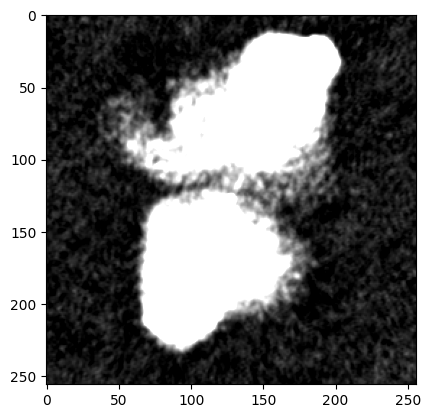

--> Opened '/data/typhon2/Rhys/data/3CR_ALL_Three/3C401'
Image size .............................. : (256, 256) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1


running pybdsf on:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C401


Beam shape (major, minor, pos angle) .... : (4.16667e-04, 4.16667e-04, 0.0) degrees
Frequency of image ...................... : 560.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.232 Jy
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 70) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 9.02e-05 Jy/beam
Value of background mean ................ : -3e-05 Jy/beam
Minimum number of pixels per island ..... : 84
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 21
Total flux density in model ............. : 0.289 Jy

--> Wavelet scale #1
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.37e-04 Jy/beam
Value of background mean ................ : -1e-05 Jy/beam


Number of islands found ................. : 11


Fitting islands with Gaussians .......... : [|] 0/11

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [/] 1/11Fitting islands with Gaussians .......... : [/] 1/11/\Fitting islands with Gaussians .......... : [/] 1/11|Fitting islands with Gaussians .......... : [/] 1/11Fitting islands with Gaussians .......... : [\] 3/11|Fitting islands with Gaussians .......... : [|] 4/11-Fitting islands with Gaussians .......... : [|] 4/11|Fitting islands with Gaussians .......... : [-] 6/11Fitting islands with Gaussians .......... : [|] 8/11-Fitting islands with Gaussians .......... : [-] 10/11[-1GFitting islands with Gaussians .......... : [] 11/11

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


[-6GFitting islands with Gaussians .......... : [] 11/11[-6G

stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 7



Checking islands for overlap ............ : [|] 0/11/

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [/] 1/11-Checking islands for overlap ............ : [-] 2/11\Checking islands for overlap ............ : [\] 3/11|Checking islands for overlap ............ : [|] 4/11/Checking islands for overlap ............ : [/] 5/11-Checking islands for overlap ............ : [-] 6/11\

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [\] 7/11|Checking islands for overlap ............ : [|] 8/11/Checking islands for overlap ............ : [/] 9/11-Checking islands for overlap ............ : [-] 10/11[-1GChecking islands for overlap ............ : [] 11/11[-6GChecking islands for overlap ............ : [] 11/11[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 7



--> Wavelet scale #2
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 1.92e-04 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 0
stty: standard input: Inappropriate ioctl for device



Checking islands for overlap ............ : [|] 0/1Checking islands for overlap ............ : [] 1/1[-4GChecking islands for overlap ............ : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #3
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (85, 28) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 1.44e-04 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #4


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.08e-04 Jy/beam
Value of background mean ................ : -5e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #5


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 9.31e-05 Jy/beam
Value of background mean ................ : -8e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #6


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.43e-04 Jy/beam
Value of background mean ................ : -9e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
Total flux density in model on all scales : 0.291 Jy


stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 3


NOTE -- With the mouse pointer in plot window:
  Press "i" ........ : Get integrated flux densities and mean rms
                       values for the visible portion of the image
  Press "m" ........ : Change min and max scaling values
  Press "n" ........ : Show / hide island IDs
  Press "0" ........ : Reset scaling to default
  Click Gaussian ... : Print Gaussian and source IDs (zoom_rect mode, 
                       toggled with the "zoom" button and indicated in 
                       the lower right corner, must be off)
________________________________________________________________________


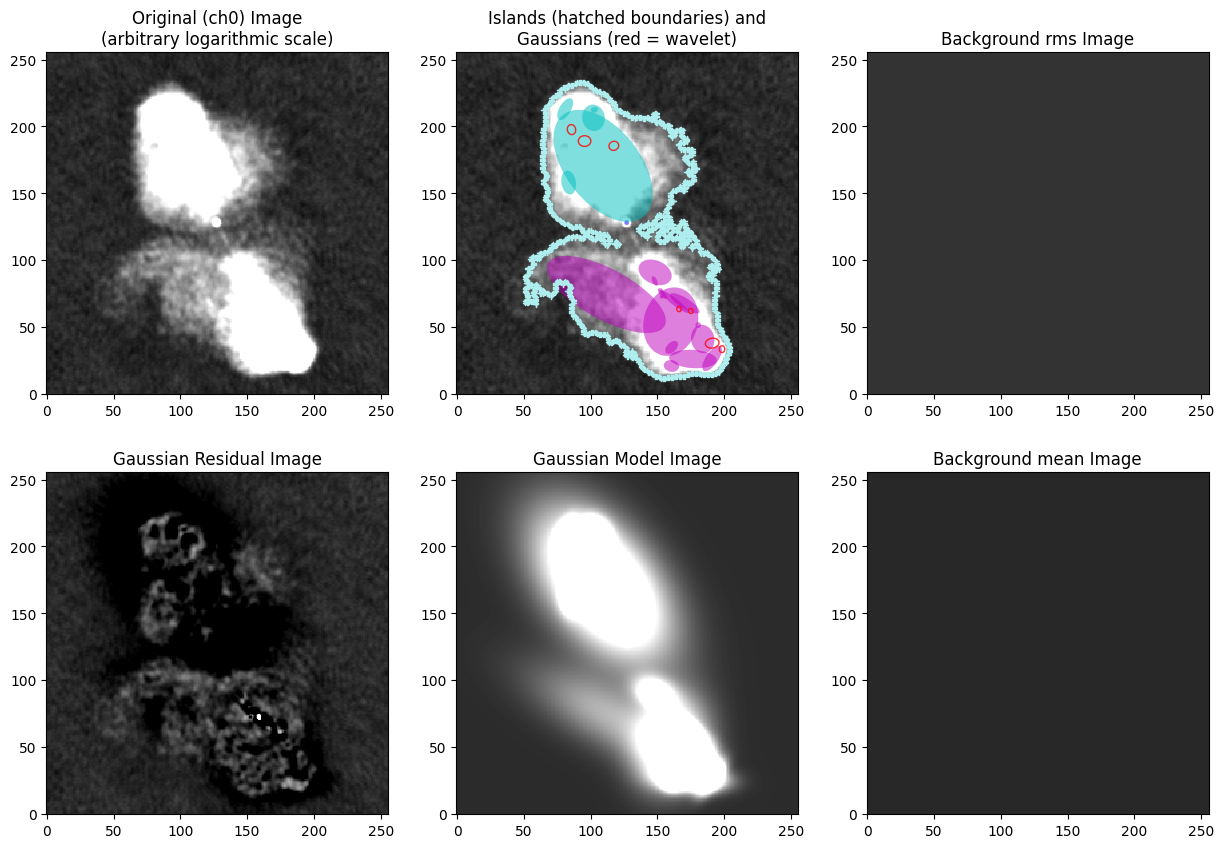

--> Wrote FITS file '3C401.pybdsf.srl.fits'
--> Wrote file '3C401.pybdsf_gaus_model.fits'
--> Wrote file '3C401.pybdsf_gaus_resid.fits'
--> Wrote file '3C401.pybdsf_island_mask.fits'
correcting fits file:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C438


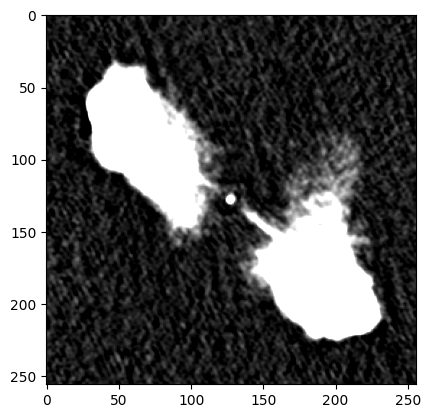

--> Opened '/data/typhon2/Rhys/data/3CR_ALL_Three/3C438'
Image size .............................. : (256, 256) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1


running pybdsf on:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C438


Beam shape (major, minor, pos angle) .... : (4.16667e-04, 4.16667e-04, 0.0) degrees
Frequency of image ...................... : 560.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.227 Jy
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 70) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 1.08e-04 Jy/beam
Value of background mean ................ : -1e-05 Jy/beam
Minimum number of pixels per island ..... : 104
Number of islands found ................. : 2


Fitting islands with Gaussians .......... : [|] 0/2

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 1/2

stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 2/2[-4GFitting islands with Gaussians .......... : [] 2/2[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 62
Total flux density in model ............. : 0.305 Jy

--> Wavelet scale #1


--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 9.41e-05 Jy/beam
Value of background mean ................ : -1e-05 Jy/beam
Number of islands found ................. : 17


Fitting islands with Gaussians .......... : [|] 0/17

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 1/17/--Fitting islands with Gaussians .......... : [/] 1/17\Fitting islands with Gaussians .......... : [/] 1/17Fitting islands with Gaussians .......... : [-] 2/17/Fitting islands with Gaussians .......... : [-] 2/17-Fitting islands with Gaussians .......... : [\] 3/17Fitting islands with Gaussians .......... : [/] 5/17Fitting islands with Gaussians .......... : [-] 6/17/

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 9/17-Fitting islands with Gaussians .......... : [-] 10/17\Fitting islands with Gaussians .......... : [\] 11/17|Fitting islands with Gaussians .......... : [|] 12/17

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 13/17Fitting islands with Gaussians .......... : [/] 13/17\

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 15/17|Fitting islands with Gaussians .......... : [|] 16/17[-2G

stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 17/17[-6GFitting islands with Gaussians .......... : [] 17/17[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 11



Checking islands for overlap ............ : [|] 0/17/Checking islands for overlap ............ : [/] 1/17-Checking islands for overlap ............ : [-] 2/17\Checking islands for overlap ............ : [\] 3/17|

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [|] 4/17/Checking islands for overlap ............ : [/] 5/17-Checking islands for overlap ............ : [-] 6/17\Checking islands for overlap ............ : [\] 7/17|Checking islands for overlap ............ : [|] 8/17/Checking islands for overlap ............ : [/] 9/17-Checking islands for overlap ............ : [-] 10/17\Checking islands for overlap ............ : [\] 11/17|Checking islands for overlap ............ : [|] 12/17/Checking islands for overlap ............ : [/] 13/17-Checking islands for overlap ............ : [-] 14/17\

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [\] 15/17|Checking islands for overlap ............ : [|] 16/17[-2GChecking islands for overlap ............ : [] 17/17[-6GChecking islands for overlap ............ : [] 17/17[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 11



--> Wavelet scale #2
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 5.43e-05 Jy/beam
Value of background mean ................ : -1e-05 Jy/beam
Number of islands found ................. : 7


Fitting islands with Gaussians .......... : [|] 0/7

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 1/7/Fitting islands with Gaussians .......... : [/] 1/7Fitting islands with Gaussians .......... : [/] 1/7||Fitting islands with Gaussians .......... : [|] 4/7Fitting islands with Gaussians .......... : [|] 4/7

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 6/7Fitting islands with Gaussians .......... : [] 7/7[-4GFitting islands with Gaussians .......... : [] 7/7[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Total number of Gaussians fit to image .. : 3


Checking islands for overlap ............ : [|] 0/7/Checking islands for overlap ............ : [/] 1/7-Checking islands for overlap ............ : [-] 2/7\

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [\] 3/7|Checking islands for overlap ............ : [|] 4/7/Checking islands for overlap ............ : [/] 5/7-Checking islands for overlap ............ : [-] 6/7Checking islands for overlap ............ : [] 7/7[-4GChecking islands for overlap ............ : [] 7/7[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 3



--> Wavelet scale #3
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (85, 28) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.54e-05 Jy/beam
Value of background mean ................ : -1e-05 Jy/beam
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 1



Checking islands for overlap ............ : [|] 0/1Checking islands for overlap ............ : [] 1/1[-4GChecking islands for overlap ............ : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1



--> Wavelet scale #4
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.70e-05 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #5


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.19e-05 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #6
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 2.83e-04 Jy/beam
Value of background mean ................ : -0.00026 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0


Total flux density in model on all scales : 0.309 Jy
stty: standard input--> Grouping Gaussians into sources
: Inappropriate ioctl for device
Number of sources formed from Gaussians   : 13


NOTE -- With the mouse pointer in plot window:
  Press "i" ........ : Get integrated flux densities and mean rms
                       values for the visible portion of the image
  Press "m" ........ : Change min and max scaling values
  Press "n" ........ : Show / hide island IDs
  Press "0" ........ : Reset scaling to default
  Click Gaussian ... : Print Gaussian and source IDs (zoom_rect mode, 
                       toggled with the "zoom" button and indicated in 
                       the lower right corner, must be off)
________________________________________________________________________


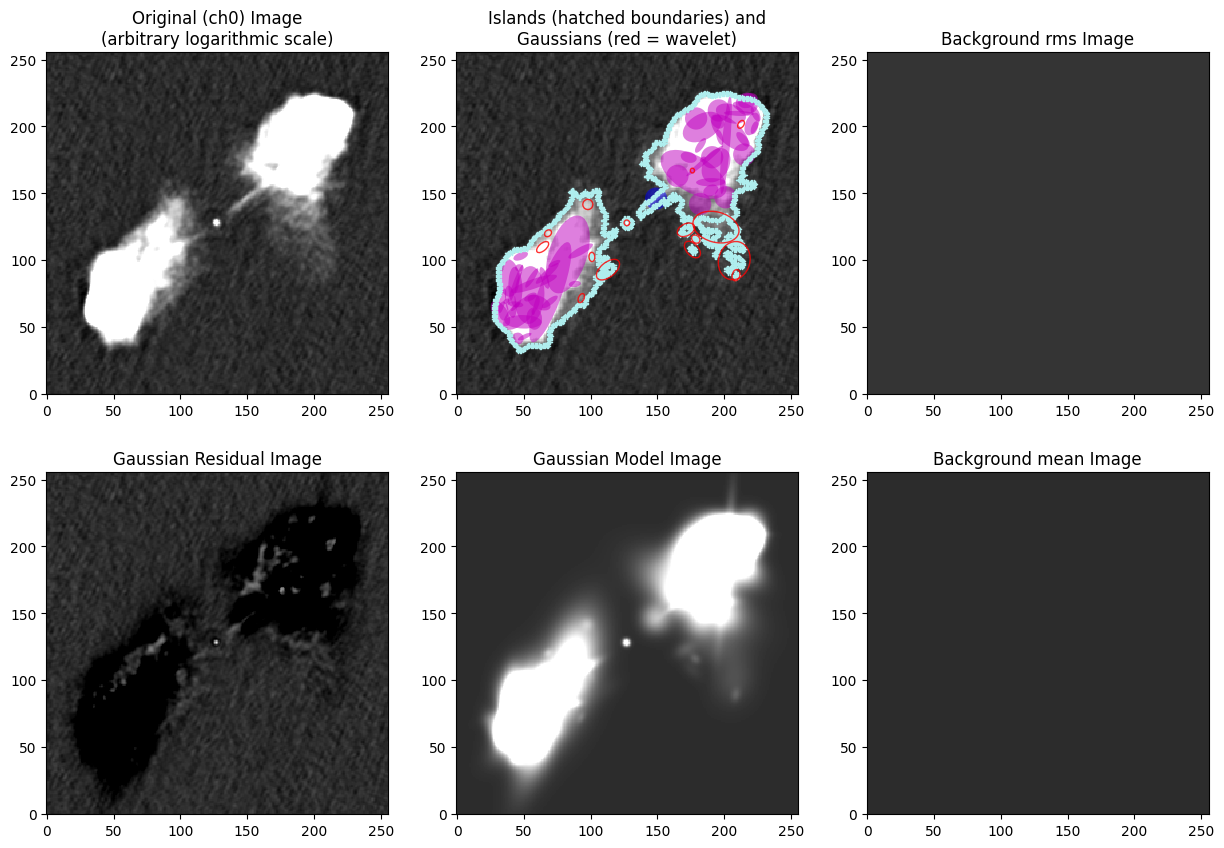

--> Wrote FITS file '3C438.pybdsf.srl.fits'
--> Wrote file '3C438.pybdsf_gaus_model.fits'
--> Wrote file '3C438.pybdsf_gaus_resid.fits'
--> Wrote file '3C438.pybdsf_island_mask.fits'
correcting fits file:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C452


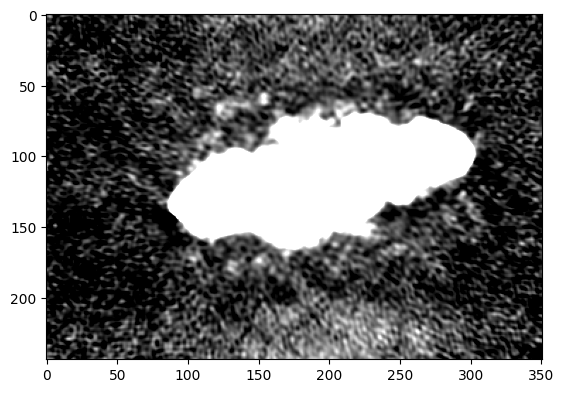

--> Opened '/data/typhon2/Rhys/data/3CR_ALL_Three/3C452'
Image size .............................. : (351, 244) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1


running pybdsf on:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C452


Beam shape (major, minor, pos angle) .... : (4.16667e-04, 4.16667e-04, 0.0) degrees
Frequency of image ...................... : 560.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 172.686 Jy
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 70) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.77e-04 Jy/beam
Value of background mean ................ : 9e-05 Jy/beam
Minimum number of pixels per island ..... : 6
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 34
Total flux density in model ............. : 16.932 Jy

--> Wavelet scale #1


--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.20e-04 Jy/beam
Value of background mean ................ : 8e-05 Jy/beam
Number of islands found ................. : 4


Fitting islands with Gaussians .......... : [|] 0/4

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [/] 1/4Fitting islands with Gaussians .......... : [/] 1/4Fitting islands with Gaussians .......... : [/] 1/4

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 4/4[-4GFitting islands with Gaussians .......... : [] 4/4[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 27



Checking islands for overlap ............ : [|] 0/4/Checking islands for overlap ............ : [/] 1/4-Checking islands for overlap ............ : [-] 2/4\Checking islands for overlap ............ : [\] 3/4Checking islands for overlap ............ : [] 4/4[-4GChecking islands for overlap ............ : [] 4/4[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources


Number of sources formed from Gaussians   : 5

--> Wavelet scale #2
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.01e-04 Jy/beam
Value of background mean ................ : 5e-05 Jy/beam
Number of islands found ................. : 22


Fitting islands with Gaussians .......... : [|] 0/22

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [/] 1/22Fitting islands with Gaussians .......... : [/] 1/22Fitting islands with Gaussians .......... : [/] 1/22|||Fitting islands with Gaussians .......... : [|] 4/22Fitting islands with Gaussians .......... : [|] 4/22Fitting islands with Gaussians .......... : [|] 4/22/\Fitting islands with Gaussians .......... : [\] 7/22Fitting islands with Gaussians .......... : [/] 5/22/Fitting islands with Gaussians .......... : [/] 9/22--

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 10/22Fitting islands with Gaussians .......... : [-] 10/22||Fitting islands with Gaussians .......... : [|] 12/22//Fitting islands with Gaussians .......... : [|] 12/22Fitting islands with Gaussians .......... : [/] 13/22Fitting islands with Gaussians .......... : [/] 13/22||Fitting islands with Gaussians .......... : [|] 16/22|Fitting islands with Gaussians .......... : [|] 16/22Fitting islands with Gaussians .......... : [|] 16/22\

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 19/22|Fitting islands with Gaussians .......... : [|] 20/22[-1G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 21/22[-3G

stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 22/22[-6GFitting islands with Gaussians .......... : [] 22/22[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 22



Checking islands for overlap ............ : [|] 0/22/Checking islands for overlap ............ : [/] 1/22-Checking islands for overlap ............ : [-] 2/22\

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [\] 3/22|Checking islands for overlap ............ : [|] 4/22/Checking islands for overlap ............ : [/] 5/22-Checking islands for overlap ............ : [-] 6/22\Checking islands for overlap ............ : [\] 7/22|Checking islands for overlap ............ : [|] 8/22/Checking islands for overlap ............ : [/] 9/22-Checking islands for overlap ............ : [-] 10/22\Checking islands for overlap ............ : [\] 11/22|Checking islands for overlap ............ : [|] 12/22/

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [/] 13/22-Checking islands for overlap ............ : [-] 14/22\Checking islands for overlap ............ : [\] 15/22|Checking islands for overlap ............ : [|] 16/22/

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [/] 17/22-Checking islands for overlap ............ : [-] 18/22\Checking islands for overlap ............ : [\] 19/22|Checking islands for overlap ............ : [|] 20/22[-1G/Checking islands for overlap ............ : [/] 21/22[-3GChecking islands for overlap ............ : [] 22/22[-6GChecking islands for overlap ............ : [] 22/22[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources


Number of sources formed from Gaussians   : 16

--> Wavelet scale #3
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (85, 28) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 1.75e-04 Jy/beam
Value of background mean ................ : 3e-05 Jy/beam
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 1



Checking islands for overlap ............ : [|] 0/1Checking islands for overlap ............ : [] 1/1[-4GChecking islands for overlap ............ : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1



--> Wavelet scale #4
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.51e-04 Jy/beam
Value of background mean ................ : 2e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #5


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.57e-04 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #6


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 2.41e-04 Jy/beam
Value of background mean ................ : -9e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0


Total flux density in model on all scales : 182.225 Jy
stty: standard input--> Grouping Gaussians into sources
: Inappropriate ioctl for device
Number of sources formed from Gaussians   : 21


NOTE -- With the mouse pointer in plot window:
  Press "i" ........ : Get integrated flux densities and mean rms
                       values for the visible portion of the image
  Press "m" ........ : Change min and max scaling values
  Press "n" ........ : Show / hide island IDs
  Press "0" ........ : Reset scaling to default
  Click Gaussian ... : Print Gaussian and source IDs (zoom_rect mode, 
                       toggled with the "zoom" button and indicated in 
                       the lower right corner, must be off)
________________________________________________________________________


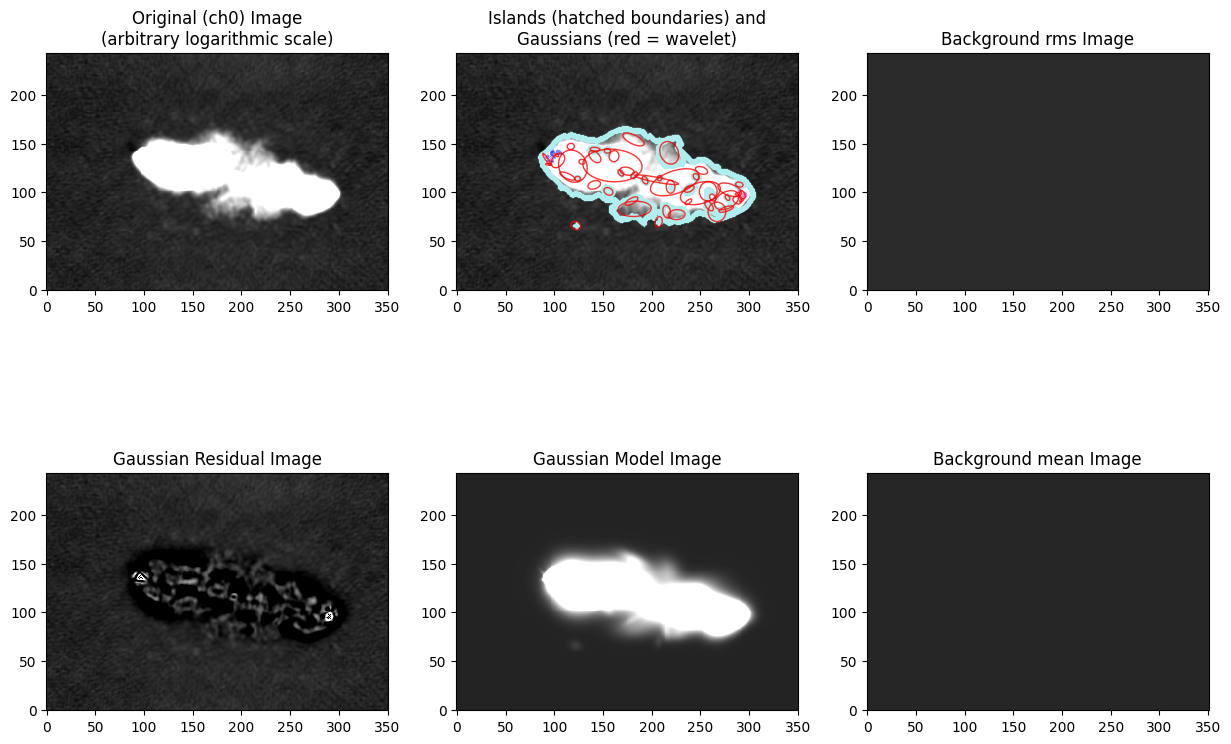

--> Wrote FITS file '3C452.pybdsf.srl.fits'
--> Wrote file '3C452.pybdsf_gaus_model.fits'
--> Wrote file '3C452.pybdsf_gaus_resid.fits'
--> Wrote file '3C452.pybdsf_island_mask.fits'
correcting fits file:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C295


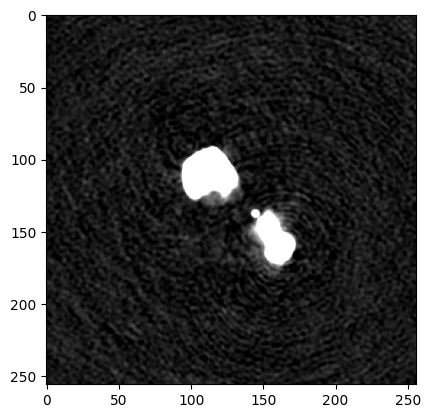

--> Opened '/data/typhon2/Rhys/data/3CR_ALL_Three/3C295'
Image size .............................. : (256, 256) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (4.16667e-04, 4.16667e-04, 0.0) degrees


running pybdsf on:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C295


Frequency of image ...................... : 560.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.057 Jy
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 70) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 6.08e-05 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Minimum number of pixels per island ..... : 236
Number of islands found ................. : 2


Fitting islands with Gaussians .......... : [|] 0/2

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 1/2

stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 2/2[-4GFitting islands with Gaussians .......... : [] 2/2[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 11
Total flux density in model ............. : 0.058 Jy

--> Wavelet scale #1
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size


--> Using constant background rms and mean
Value of background rms ................. : 3.99e-05 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Number of islands found ................. : 14


Fitting islands with Gaussians .......... : [|] 0/14

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 1/14/-Fitting islands with Gaussians .......... : [-] 2/14Fitting islands with Gaussians .......... : [/] 1/14||Fitting islands with Gaussians .......... : [|] 4/14

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 4/14-Fitting islands with Gaussians .......... : [-] 6/14

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 7/14

stty: standard input: Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 8/14

stty: standard input: Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 9/14-Fitting islands with Gaussians .......... : [-] 10/14

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 11/14|Fitting islands with Gaussians .......... : [|] 12/14/Fitting islands with Gaussians .......... : [/] 13/14[-2G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 14/14[-6GFitting islands with Gaussians .......... : [] 14/14[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 4



Checking islands for overlap ............ : [|] 0/14/Checking islands for overlap ............ : [/] 1/14-Checking islands for overlap ............ : [-] 2/14\Checking islands for overlap ............ : [\] 3/14|Checking islands for overlap ............ : [|] 4/14/

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Checking islands for overlap ............ : [/] 5/14-Checking islands for overlap ............ : [-] 6/14\Checking islands for overlap ............ : [\] 7/14|Checking islands for overlap ............ : [|] 8/14/Checking islands for overlap ............ : [/] 9/14-Checking islands for overlap ............ : [-] 10/14\Checking islands for overlap ............ : [\] 11/14|Checking islands for overlap ............ : [|] 12/14/Checking islands for overlap ............ : [/] 13/14[-2GChecking islands for overlap ............ : [] 14/14[-6GChecking islands for overlap ............ : [] 14/14[-6G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 3



--> Wavelet scale #2
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.62e-05 Jy/beam
Value of background mean ................ : -1e-05 Jy/beam
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 0



Checking islands for overlap ............ : [|] 0/1Checking islands for overlap ............ : [] 1/1[-4GChecking islands for overlap ............ : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #3
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (85, 28) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 1.63e-05 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #4


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 9.63e-06 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #5


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 7.55e-06 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #6


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 6.00e-05 Jy/beam
Value of background mean ................ : -4e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
Total flux density in model on all scales : 0.074 Jy


stty: standard input--> Grouping Gaussians into sources
: Inappropriate ioctl for device
Number of sources formed from Gaussians   : 2


NOTE -- With the mouse pointer in plot window:
  Press "i" ........ : Get integrated flux densities and mean rms
                       values for the visible portion of the image
  Press "m" ........ : Change min and max scaling values
  Press "n" ........ : Show / hide island IDs
  Press "0" ........ : Reset scaling to default
  Click Gaussian ... : Print Gaussian and source IDs (zoom_rect mode, 
                       toggled with the "zoom" button and indicated in 
                       the lower right corner, must be off)
________________________________________________________________________


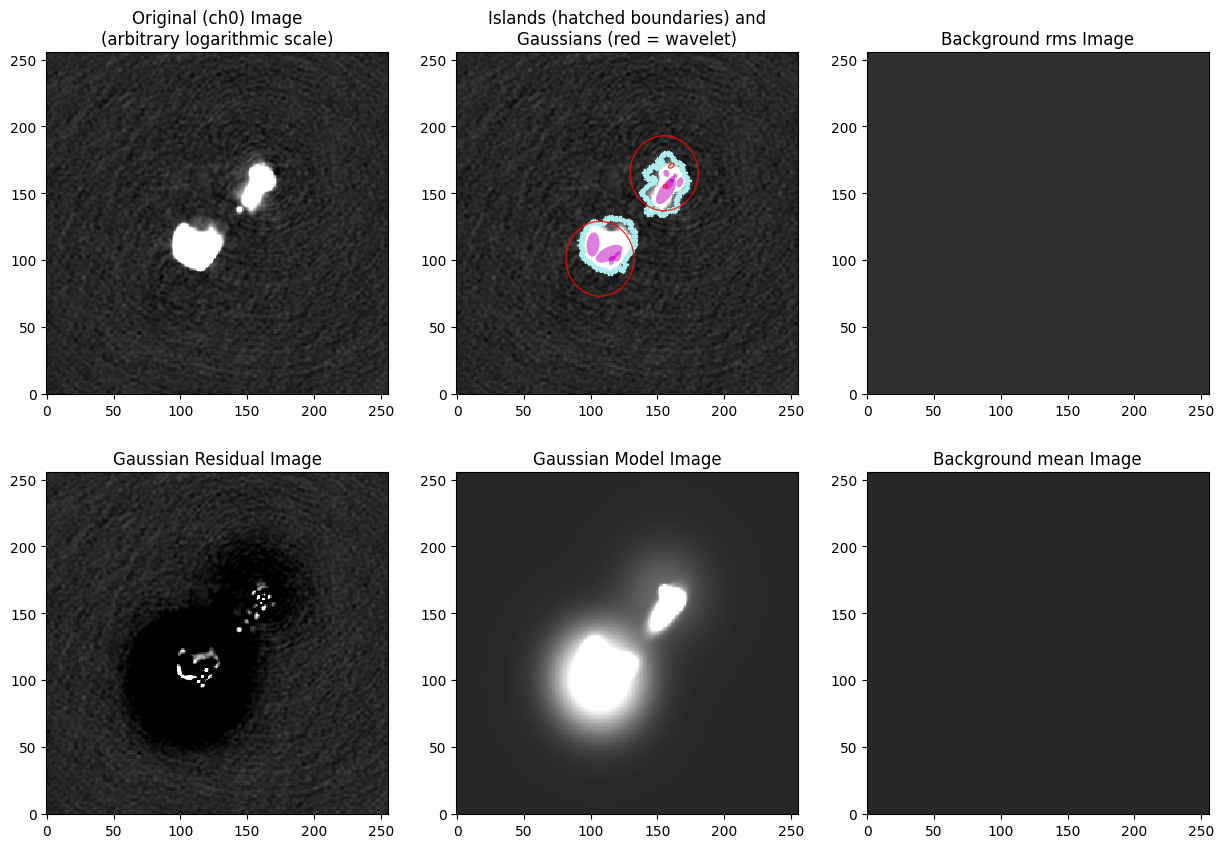

--> Wrote FITS file '3C295.pybdsf.srl.fits'
--> Wrote file '3C295.pybdsf_gaus_model.fits'
--> Wrote file '3C295.pybdsf_gaus_resid.fits'
--> Wrote file '3C295.pybdsf_island_mask.fits'
correcting fits file:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C76P1


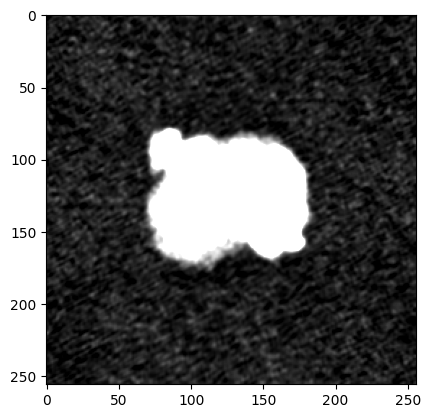

--> Opened '/data/typhon2/Rhys/data/3CR_ALL_Three/3C76P1'
Image size .............................. : (256, 256) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (4.16667e-04, 4.16667e-04, 0.0) degrees


running pybdsf on:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C76P1


Frequency of image ...................... : 560.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 32.307 Jy
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 70) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 8.07e-05 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam
Minimum number of pixels per island ..... : 6
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 6
Total flux density in model ............. : 2.042 Jy

--> Wavelet scale #1
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 5.99e-05 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam


Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 52



Checking islands for overlap ............ : [|] 0/1Checking islands for overlap ............ : [] 1/1[-4GChecking islands for overlap ............ : [] 1/1[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources


Number of sources formed from Gaussians   : 1

--> Wavelet scale #2
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (70, 23) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 4.53e-05 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam
Number of islands found ................. : 2


Fitting islands with Gaussians .......... : [|] 0/2

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 1/2Fitting islands with Gaussians .......... : [/] 1/2Fitting islands with Gaussians .......... : [] 2/2[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 0



Checking islands for overlap ............ : [|] 0/2/Checking islands for overlap ............ : [/] 1/2Checking islands for overlap ............ : [] 2/2[-4GChecking islands for overlap ............ : [] 2/2[-4G

stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #3
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (85, 28) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 2.98e-05 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #4


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 2.14e-05 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #5


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.43e-05 Jy/beam
Value of background mean ................ : 1e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0

--> Wavelet scale #6


--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 4.07e-05 Jy/beam
Value of background mean ................ : -2e-05 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
stty: standard input: Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
Total flux density in model on all scales : 39.551 Jy


stty: standard input--> Grouping Gaussians into sources
: Inappropriate ioctl for device
Number of sources formed from Gaussians   : 1


NOTE -- With the mouse pointer in plot window:
  Press "i" ........ : Get integrated flux densities and mean rms
                       values for the visible portion of the image
  Press "m" ........ : Change min and max scaling values
  Press "n" ........ : Show / hide island IDs
  Press "0" ........ : Reset scaling to default
  Click Gaussian ... : Print Gaussian and source IDs (zoom_rect mode, 
                       toggled with the "zoom" button and indicated in 
                       the lower right corner, must be off)
________________________________________________________________________


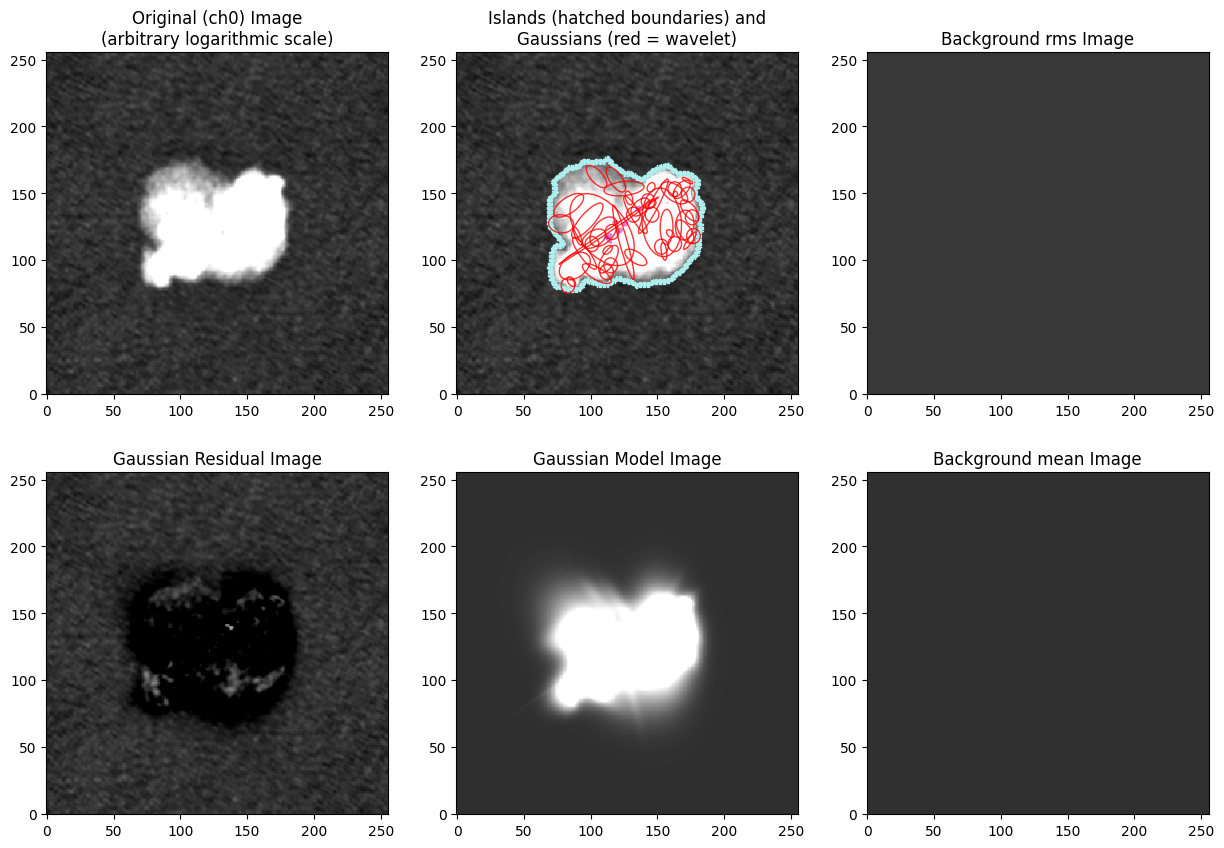

--> Wrote FITS file '3C76P1.pybdsf.srl.fits'
--> Wrote file '3C76P1.pybdsf_gaus_model.fits'
--> Wrote file '3C76P1.pybdsf_gaus_resid.fits'
--> Wrote file '3C76P1.pybdsf_island_mask.fits'
correcting fits file:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C314P1


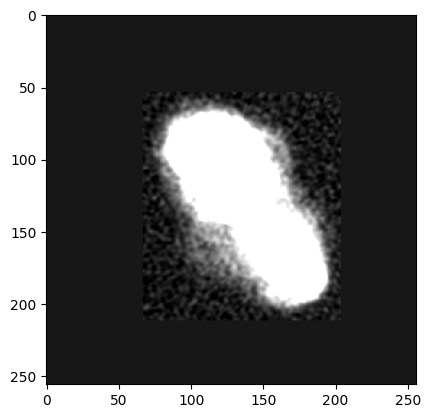

--> Opened '/data/typhon2/Rhys/data/3CR_ALL_Three/3C314P1'
Image size .............................. : (256, 256) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (4.16667e-04, 4.16667e-04, 0.0) degrees


running pybdsf on:  /data/typhon2/Rhys/data/3CR_ALL_Three/3C314P1


Frequency of image ...................... : 560.000 MHz
Number of blank pixels .................. : 0 (0.0%)
ERROR: A region with an unphysical rms value has been found. Please check the input image.


RuntimeError: A region with an unphysical rms value has been found. Please check the input image.

In [3]:
for i in range(0,len(filenames)):
    pybdsf_processing(filename=PATH_to_Datafile+filenames[i])

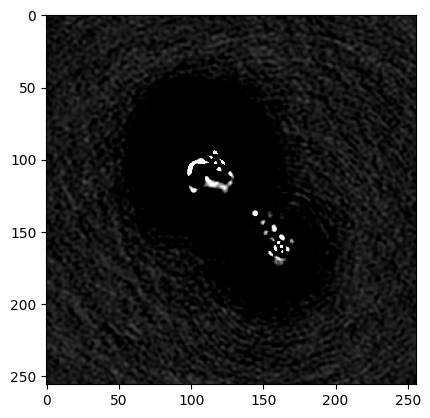

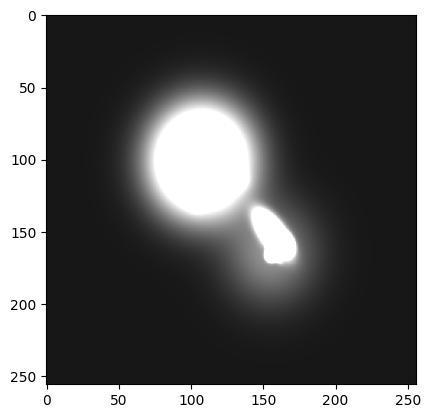

In [ ]:
image_resid = fits.open('3C295.pybdsf_gaus_resid.fits')[0].data[0,0,:,:]
image_model = fits.open('3C295.pybdsf_gaus_model.fits')[0].data[0,0,:,:]
plt.imshow(image_resid[:,:],vmax=0.001,vmin=-0.0001,cmap='gray')
plt.show()

plt.imshow(image_model[:,:],vmax=0.001,vmin=-0.0001,cmap='gray')
plt.show()

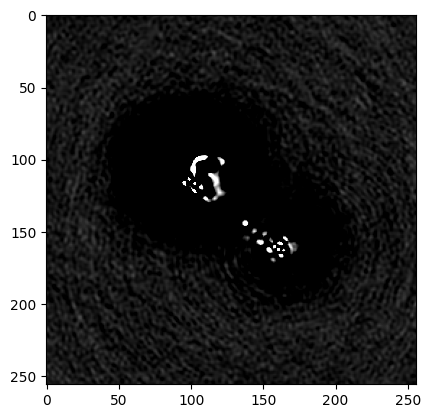

In [ ]:
# BDSF on COSOMO Image

import bdsf
from astropy.io import fits
PATH = '/data/typhon2/Rhys/data/MIGHTEE/MIGHTEE_Continuum_Early_Science_XMMLSS_r0p0_circ.fits'
hdu = fits.open(PATH)
header = hdu[0].header
BMAJ = header['BMAJ']
BMIN = header['BMIN']
cdelta2 = header['CDELT2']
beam_pa = 0.0
pixperbeam = BMAJ/cdelta2

    
img = bdsf.process_image(PATH, adaptive_rms_box=False, advanced_opts=False,
                        atrous_do=True, psf_vary_do=False, psf_snrcut=5.0, psf_snrcutstack=10.0,
                        output_opts=True, output_all=True, opdir_overwrite='append', beam=(BMAJ, BMIN, beam_pa),
                        blank_limit=None, thresh='hard', thresh_isl=4.0, thresh_pix=3.0, psf_snrtop=0.30,
                        rms_map=True, rms_box=(10*pixperbeam, 10*pixperbeam), do_cache=True)
    

img.show_fit()

--> Opened '/data/typhon2/Rhys/data/MIGHTEE/MIGHTEE_Continuum_Early_Science_XMMLSS_r0p0_circ.fits'
Image size .............................. : (9203, 4706) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1


Beam shape (major, minor, pos angle) .... : (2.27778e-03, 2.27778e-03, 0.0) degrees
Frequency of image ...................... : 1283.941 MHz
Number of blank pixels .................. : 5583215 (12.9%)
Flux from sum of (non-blank) pixels ..... : 4.061 Jy

--> Aborted


KeyboardInterrupt: 

In [ ]:
img.write_catalog(format='fits', catalog_type='srl', outfile='/data/typhon2/data/MIGHTEE/COSMO_r0p0.bdsf.fits')


In [ ]:
# open and look at the catalog
from astropy.table import Table
t = Table.read('3C295.pybdsf.gaul.fits')
df = t.to_pandas()